In [114]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import scipy.stats as stats
import matplotlib.pyplot as plt

# Python cheat sheet
- How to generate random numbers
- Simple operations on a pandas dataframe
- How to make a plot
- How to define a function
- How to fit a distribution

# How to generate random numbers

Random numbers can be generated using the numpy package random. A few examples are given below. More documentation is available on https://docs.scipy.org/doc/numpy-1.14.0/reference/routines.random.html

In [2]:
# uniforme distribution
np.random.uniform(size=10)

array([ 0.93493013,  0.08705981,  0.39696468,  0.4355748 ,  0.17680101,
        0.01718971,  0.79520736,  0.25967697,  0.71706798,  0.67014868])

In [3]:
# poisson distribution
np.random.poisson(lam=2, size=10)

array([1, 0, 3, 0, 1, 3, 1, 3, 2, 0])

In [4]:
# gaussian distribution
np.random.normal(loc=10, scale=2., size=10)

array([  8.79534705,   9.4303934 ,  13.30863672,  10.82346537,
         8.68867156,  10.67666425,  14.5190096 ,  10.23183594,
         9.52533084,  11.79161766])

In [9]:
# binomial distribution (returns the number of sucesses)
np.random.binomial(3,0.3, size=10)

array([1, 2, 1, 1, 1, 1, 1, 0, 0, 1])

# Creating some dummy data

In [30]:
# create dummy data in a dataframe
ndata = 1000
df = pd.DataFrame({'foo':np.random.normal(loc=10, scale=2., size=ndata),
                   'bar':np.random.poisson(lam=3, size=ndata),
                   'baz':np.random.binomial(5,0.3, size=ndata)})
df.head()

,bar,baz,foo
0,3,1,11.286396
1,4,2,12.046114
2,1,3,10.458680
3,4,0,12.667795
4,2,0,12.031967


# Simple operations on a dataframe

In [155]:
# length of a dataframe
len(df)

1000

In [150]:
# get all unique values in a column
df['baz'].unique()

array([1, 2, 3, 0, 4, 5])

In [151]:
# get the sum of all values in a column
df['bar'].sum()

2980

In [154]:
# get the mean of all values in a column
df['foo'].mean()

10.110250210433195

In [161]:
# add the values in two columns
df['qux'] = df['foo'] + df['bar']

In [163]:
# add two entire dataframes
dftest = pd.DataFrame({'foo':[1,2,3],'bar':[4,5,6]})
dftest + dftest

,bar,foo
0,8,2
1,10,4
2,12,6


# How to make a plot

A few plotting examples are giving below. For additionl examples check out the link below or use google. https://matplotlib.org/tutorials/introductory/sample_plots.html

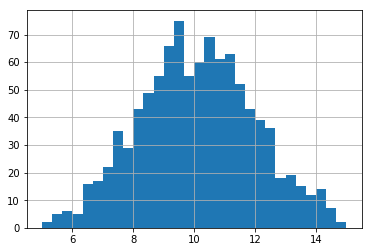

In [42]:
#### plot a histogram
fig = plt.figure(figsize=(6,4))

# plot directly for dataframe
df['foo'].hist(bins=30, range=(5,15))

# alternative way if your data is not stored in a dataframe/series
# vals = df['foo'].values
# myhist = plt.hist(vals, bins=30, range=(5,15))

# save a figure
# plt.savefig('myhist.png')

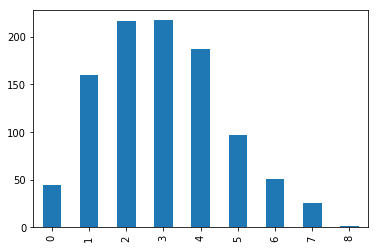

In [43]:
#### plot a bar chart
fig = plt.figure(figsize=(6,4))

# plot directly from the dataframe
df['bar'].value_counts().sort_index().plot(kind='bar')

# alternative way if your data is not stored in a dataframe/series
# xvals = df['bar'].value_counts().sort_index().index.values
# yvals = df['bar'].value_counts().sort_index().values
# plt.bar(xvals, yvals)
# xticks = plt.xticks(range(len(xvals)), xvals)

# How to define a function

In [158]:
# my_func = function name
# a, b, c = input variables of function
# y = the value which is returned by the function

def my_func(a, b, c):
    
    # type here the contents of the function
    y = a + b + c
    
    # return the output of the function
    return y

In [160]:
my_func(1,2,3)

6

# How to fit a distribution

Fitting can be done using the curve_fit function from the scipy package. This function allows one to fit any arbitrary user-defined function. For more information check out https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html



In [129]:
# user defined function to be used for fitting
def gauss(x, mu, sigma, N):
    y  = N * np.exp(-1/2 * pow((x-mu)/sigma, 2))
    return y

In [144]:
# extract the data from the dataframe
yvals = np.histogram(df['foo'], range=(5,15), bins=10)[0]
xbins = np.histogram(df['foo'], range=(5,15), bins=10)[1]
xvals = np.diff(xbins)[0]/2 + xbins[:10]

In [149]:
# make the fit
parameters, cov_matrix = curve_fit(gauss, xvals, yvals)
parameters

array([  10.07684831,    1.99431327,  199.95449519])

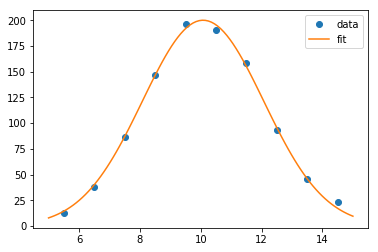

In [148]:
# plot the data
plt.plot(xvals, yvals, marker='o',linestyle='', label='data')

# plot the fit
x = np.linspace(5, 15, 100)
y = gauss(x, parameters[0], parameters[1], parameters[2])
plt.plot(x, y, label='fit')

plt.legend()